In [1]:
# from bing_image_downloader import downloader
# query_string = "norwegian male"
# downloader.download(query_string, limit = 10000, output_dir="dataset", 
#                     adult_filter_off = True, force_replace = False, timeout=60)

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.4.0


In [4]:
import pathlib
data_dir = pathlib.Path.cwd() / "dataset"


In [5]:
batch_size = 32
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13677 files belonging to 4 classes.
Using 10942 files for training.


In [7]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13677 files belonging to 4 classes.
Using 2735 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['indian female', 'indian male', 'norwegian female', 'norwegian male']


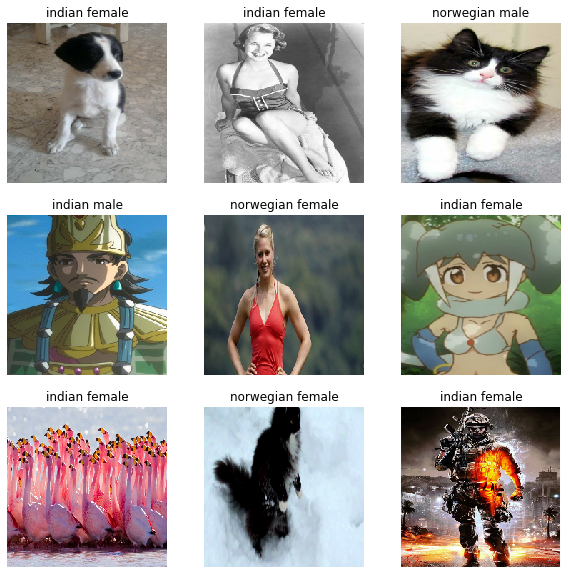

In [10]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1) :
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
count = 0
for image_batch, label_batch in train_ds :
    print(image_batch.shape, label_batch.shape)
    break
    
    
    

(32, 224, 224, 3) (32,)


In [12]:
from tensorflow.keras import layers 

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print((first_image), (first_image))

tf.Tensor(
[[[0.3991875  0.41665074 0.440434  ]
  [0.38972226 0.39295772 0.387007  ]
  [0.3513833  0.31797108 0.26987967]
  ...
  [0.35448697 0.31967425 0.3010292 ]
  [0.3474434  0.30851653 0.2743778 ]
  [0.35179028 0.29344782 0.2658044 ]]

 [[0.4846289  0.4905375  0.5119523 ]
  [0.44460624 0.43672812 0.4363342 ]
  [0.31343347 0.27408648 0.22953954]
  ...
  [0.35556468 0.32075197 0.30210692]
  [0.30173388 0.26280704 0.22866829]
  [0.47412944 0.415787   0.3881436 ]]

 [[0.49724245 0.49016085 0.5084732 ]
  [0.5060284  0.48516002 0.47734314]
  [0.4794965  0.42715925 0.37667027]
  ...
  [0.36056387 0.32623255 0.29926297]
  [0.40539905 0.3664722  0.3317558 ]
  [0.5330778  0.47856072 0.4432666 ]]

 ...

 [[0.47673318 0.47352943 0.4592788 ]
  [0.52554196 0.5223382  0.50808764]
  [0.5495984  0.54639465 0.532144  ]
  ...
  [0.4453868  0.44930837 0.4689162 ]
  [0.44193763 0.4458592  0.46546704]
  [0.44100145 0.444923   0.46453086]]

 [[0.48691615 0.4829946  0.4673083 ]
  [0.49227417 0.48835257 0

In [14]:
first_image.shape

TensorShape([224, 224, 3])

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1
)

186/342 [===============>..............] - ETA: 22:54 - loss: 1.3848 - accuracy: 0.375 - ETA: 3:31 - loss: 1.8705 - accuracy: 0.335 - ETA: 3:29 - loss: 1.9425 - accuracy: 0.32 - ETA: 3:43 - loss: 1.9302 - accuracy: 0.32 - ETA: 3:45 - loss: 1.9037 - accuracy: 0.32 - ETA: 3:44 - loss: 1.8740 - accuracy: 0.32 - ETA: 3:43 - loss: 1.8461 - accuracy: 0.32 - ETA: 3:41 - loss: 1.8192 - accuracy: 0.32 - ETA: 3:40 - loss: 1.7947 - accuracy: 0.31 - ETA: 3:40 - loss: 1.7725 - accuracy: 0.31 - ETA: 3:39 - loss: 1.7531 - accuracy: 0.31 - ETA: 3:44 - loss: 1.7348 - accuracy: 0.31 - ETA: 3:43 - loss: 1.7182 - accuracy: 0.31 - ETA: 3:42 - loss: 1.7027 - accuracy: 0.31 - ETA: 3:41 - loss: 1.6884 - accuracy: 0.31 - ETA: 3:40 - loss: 1.6749 - accuracy: 0.31 - ETA: 3:38 - loss: 1.6623 - accuracy: 0.32 - ETA: 3:37 - loss: 1.6503 - accuracy: 0.32 - ETA: 3:36 - loss: 1.6392 - accuracy: 0.32 - ETA: 3:35 - loss: 1.6282 - accuracy: 0.32 - ETA: 3:34 - loss: 1.6175 - accuracy: 0.32 - ETA: 3:34 - loss: 1.6085 - acc

342/342 [==============================] - ETA: 1:52 - loss: 0.9615 - accuracy: 0.60 - ETA: 1:51 - loss: 0.9595 - accuracy: 0.60 - ETA: 1:50 - loss: 0.9574 - accuracy: 0.60 - ETA: 1:49 - loss: 0.9554 - accuracy: 0.60 - ETA: 1:49 - loss: 0.9533 - accuracy: 0.60 - ETA: 1:48 - loss: 0.9513 - accuracy: 0.61 - ETA: 1:47 - loss: 0.9493 - accuracy: 0.61 - ETA: 1:47 - loss: 0.9473 - accuracy: 0.61 - ETA: 1:46 - loss: 0.9453 - accuracy: 0.61 - ETA: 1:45 - loss: 0.9434 - accuracy: 0.61 - ETA: 1:45 - loss: 0.9414 - accuracy: 0.61 - ETA: 1:44 - loss: 0.9394 - accuracy: 0.61 - ETA: 1:43 - loss: 0.9375 - accuracy: 0.61 - ETA: 1:42 - loss: 0.9355 - accuracy: 0.61 - ETA: 1:42 - loss: 0.9336 - accuracy: 0.61 - ETA: 1:41 - loss: 0.9317 - accuracy: 0.61 - ETA: 1:40 - loss: 0.9298 - accuracy: 0.62 - ETA: 1:40 - loss: 0.9279 - accuracy: 0.62 - ETA: 1:39 - loss: 0.9260 - accuracy: 0.62 - ETA: 1:38 - loss: 0.9242 - accuracy: 0.62 - ETA: 1:37 - loss: 0.9223 - accuracy: 0.62 - ETA: 1:37 - loss: 0.9204 - accura

In [30]:
# Saving the model
model.save('imagerecognitionmodel.h5')

In [28]:
# Predicting on unseen data
from keras.models import load_model
import cv2
import numpy as np


img = cv2.imread('test1.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

output_class = model.predict(img)

In [29]:
output_class

array([[0.20372885, 3.3150146 , 0.35292912, 2.4259286 ]], dtype=float32)

## VGG16

In [31]:
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg16 import VGG16

In [32]:
image_size = [224, 224]

In [33]:
vgg_model = VGG16(input_shape= image_size + [3], 
                  weights='imagenet', include_top = False )

In [34]:
for layer in vgg_model.layers :
    layer.trainable = False
    

In [35]:
data_dir

WindowsPath('C:/Users/aj/Documents/Image classification with Deep Learning/dataset')

In [36]:
from glob import glob
# useful for getting number of classes
folders = glob('C:/Users/aj/Documents/Image classification with Deep Learning/dataset/*')

In [37]:
len(folders)

4

In [38]:
x = Flatten()(vgg_model.output)

In [39]:
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [40]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [41]:
model1 = Model(inputs = vgg_model.input, outputs = prediction)

In [77]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [47]:
model1.compile(loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
               optimizer = 'adam', metrics = ['accuracy'])

In [48]:
model1.fit(train_ds, validation_data=val_ds, epochs=1 )

178/342 [==============>...............] - ETA: 22:17 - loss: 14.9382 - accuracy: 0.25 - ETA: 18:39 - loss: 19.9959 - accuracy: 0.27 - ETA: 18:39 - loss: 21.9507 - accuracy: 0.29 - ETA: 18:46 - loss: 22.2262 - accuracy: 0.31 - ETA: 18:58 - loss: 22.0697 - accuracy: 0.34 - ETA: 19:12 - loss: 21.6357 - accuracy: 0.36 - ETA: 19:18 - loss: 21.1698 - accuracy: 0.38 - ETA: 19:24 - loss: 20.5853 - accuracy: 0.40 - ETA: 19:30 - loss: 20.0400 - accuracy: 0.42 - ETA: 19:47 - loss: 19.5377 - accuracy: 0.44 - ETA: 19:53 - loss: 19.1069 - accuracy: 0.45 - ETA: 19:58 - loss: 18.7031 - accuracy: 0.46 - ETA: 20:04 - loss: 18.3014 - accuracy: 0.48 - ETA: 20:08 - loss: 17.9328 - accuracy: 0.49 - ETA: 20:13 - loss: 17.5760 - accuracy: 0.50 - ETA: 20:16 - loss: 17.2446 - accuracy: 0.51 - ETA: 20:18 - loss: 16.9453 - accuracy: 0.52 - ETA: 20:20 - loss: 16.6845 - accuracy: 0.52 - ETA: 20:21 - loss: 16.4255 - accuracy: 0.53 - ETA: 20:21 - loss: 16.2006 - accuracy: 0.54 - ETA: 20:22 - loss: 15.9973 - accuracy

342/342 [==============================] - ETA: 11:54 - loss: 7.9982 - accuracy: 0.818 - ETA: 11:50 - loss: 7.9805 - accuracy: 0.818 - ETA: 11:46 - loss: 7.9628 - accuracy: 0.819 - ETA: 11:41 - loss: 7.9453 - accuracy: 0.819 - ETA: 11:37 - loss: 7.9277 - accuracy: 0.820 - ETA: 11:33 - loss: 7.9103 - accuracy: 0.820 - ETA: 11:28 - loss: 7.8930 - accuracy: 0.821 - ETA: 11:24 - loss: 7.8757 - accuracy: 0.821 - ETA: 11:20 - loss: 7.8587 - accuracy: 0.821 - ETA: 11:15 - loss: 7.8416 - accuracy: 0.822 - ETA: 11:11 - loss: 7.8249 - accuracy: 0.822 - ETA: 11:07 - loss: 7.8083 - accuracy: 0.823 - ETA: 11:02 - loss: 7.7917 - accuracy: 0.823 - ETA: 10:58 - loss: 7.7752 - accuracy: 0.824 - ETA: 10:54 - loss: 7.7588 - accuracy: 0.824 - ETA: 10:50 - loss: 7.7424 - accuracy: 0.825 - ETA: 10:45 - loss: 7.7262 - accuracy: 0.825 - ETA: 10:41 - loss: 7.7099 - accuracy: 0.826 - ETA: 10:37 - loss: 7.6937 - accuracy: 0.826 - ETA: 10:33 - loss: 7.6776 - accuracy: 0.826 - ETA: 10:29 - loss: 7.6616 - accuracy:

In [70]:
# Saving the model
model1.save('vgg16model.h5')

In [67]:
# Predicting on unseen data
from keras.models import load_model
import cv2
import numpy as np


img = cv2.imread('test5.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

output_class = model1.predict(img)

In [68]:
score = tf.nn.softmax(output_class[0])
class_name = class_names[np.argmax(score)]
class_name

'norwegian female'

## ResNet50

In [71]:
from keras.applications.resnet50 import ResNet50

In [72]:
resnet50_model = ResNet50(input_shape= image_size + [3], 
                          weights='imagenet', include_top = False )

94773248/94765736 [==============================] - ETA:  - ETA: 52 - ETA: 21 - ETA: 12 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 0us/step


In [73]:
for layer in resnet50_model.layers :
    layer.trainable = False

In [74]:
x = Flatten()(resnet50_model.output)

In [75]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [76]:
model2 = Model(inputs = resnet50_model.input, outputs = prediction)

In [78]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

conv2_block3_out (Activation)   (None, 56, 56, 256)  0           conv2_block3_add[0][0]           
__________________________________________________________________________________________________
conv3_block1_1_conv (Conv2D)    (None, 28, 28, 128)  32896       conv2_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block1_1_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_1_relu (Activation (None, 28, 28, 128)  0           conv3_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_2_conv (Conv2D)    (None, 28, 28, 128)  147584      conv3_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_bloc

__________________________________________________________________________________________________
conv3_block4_3_bn (BatchNormali (None, 28, 28, 512)  2048        conv3_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_add (Add)          (None, 28, 28, 512)  0           conv3_block3_out[0][0]           
                                                                 conv3_block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_bloc

__________________________________________________________________________________________________
conv4_block4_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block4_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_2_relu (Activation (None, 14, 14, 256)  0           conv4_block4_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_3_conv (Conv2D)    (None, 14, 14, 1024) 263168      conv4_block4_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block4_3_bn (BatchNormali (None, 14, 14, 1024) 4096        conv4_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_add (Add)          (None, 14, 14, 1024) 0           conv4_block3_out[0][0]           
          

__________________________________________________________________________________________________
conv5_block2_1_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_relu (Activation (None, 7, 7, 512)    0           conv5_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_2_conv (Conv2D)    (None, 7, 7, 512)    2359808     conv5_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_bn (BatchNormali (None, 7, 7, 512)    2048        conv5_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_relu (Activation (None, 7, 7, 512)    0           conv5_block2_2_bn[0][0]          
__________

In [79]:
model2.compile(loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [80]:
model2.fit(train_ds, validation_data=val_ds, epochs=1 )

185/342 [===============>..............] - ETA: 22:35 - loss: 3.1203 - accuracy: 0.218 - ETA: 8:02 - loss: 5.3609 - accuracy: 0.257 - ETA: 7:57 - loss: 7.4870 - accuracy: 0.27 - ETA: 7:55 - loss: 9.0522 - accuracy: 0.28 - ETA: 7:54 - loss: 9.7677 - accuracy: 0.29 - ETA: 7:52 - loss: 10.0650 - accuracy: 0.306 - ETA: 7:51 - loss: 10.2089 - accuracy: 0.322 - ETA: 7:50 - loss: 10.2574 - accuracy: 0.339 - ETA: 7:49 - loss: 10.2516 - accuracy: 0.355 - ETA: 7:47 - loss: 10.2243 - accuracy: 0.369 - ETA: 7:46 - loss: 10.1444 - accuracy: 0.384 - ETA: 7:45 - loss: 10.0342 - accuracy: 0.399 - ETA: 7:44 - loss: 9.9118 - accuracy: 0.412 - ETA: 7:43 - loss: 9.8013 - accuracy: 0.42 - ETA: 7:42 - loss: 9.6854 - accuracy: 0.43 - ETA: 7:41 - loss: 9.5669 - accuracy: 0.44 - ETA: 7:40 - loss: 9.4575 - accuracy: 0.45 - ETA: 7:40 - loss: 9.3428 - accuracy: 0.46 - ETA: 7:39 - loss: 9.2296 - accuracy: 0.47 - ETA: 7:38 - loss: 9.1173 - accuracy: 0.48 - ETA: 7:38 - loss: 9.0194 - accuracy: 0.49 - ETA: 7:38 - los

342/342 [==============================] - ETA: 4:13 - loss: 4.4771 - accuracy: 0.80 - ETA: 4:11 - loss: 4.4689 - accuracy: 0.80 - ETA: 4:10 - loss: 4.4607 - accuracy: 0.80 - ETA: 4:08 - loss: 4.4527 - accuracy: 0.80 - ETA: 4:07 - loss: 4.4447 - accuracy: 0.80 - ETA: 4:05 - loss: 4.4367 - accuracy: 0.80 - ETA: 4:04 - loss: 4.4288 - accuracy: 0.80 - ETA: 4:02 - loss: 4.4209 - accuracy: 0.80 - ETA: 4:00 - loss: 4.4130 - accuracy: 0.80 - ETA: 3:59 - loss: 4.4053 - accuracy: 0.80 - ETA: 3:57 - loss: 4.3976 - accuracy: 0.80 - ETA: 3:56 - loss: 4.3898 - accuracy: 0.80 - ETA: 3:54 - loss: 4.3821 - accuracy: 0.80 - ETA: 3:53 - loss: 4.3744 - accuracy: 0.80 - ETA: 3:51 - loss: 4.3668 - accuracy: 0.80 - ETA: 3:49 - loss: 4.3594 - accuracy: 0.80 - ETA: 3:48 - loss: 4.3521 - accuracy: 0.80 - ETA: 3:46 - loss: 4.3449 - accuracy: 0.81 - ETA: 3:45 - loss: 4.3377 - accuracy: 0.81 - ETA: 3:43 - loss: 4.3306 - accuracy: 0.81 - ETA: 3:41 - loss: 4.3236 - accuracy: 0.81 - ETA: 3:40 - loss: 4.3166 - accura

In [81]:
# Saving the model
model2.save('resnet50model.h5')

In [94]:
# Predicting on unseen data
from keras.models import load_model
import cv2
import numpy as np


img = cv2.imread('test5.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

output_class = model2.predict(img)

In [95]:
score = tf.nn.softmax(output_class[0])
class_name = class_names[np.argmax(score)]
class_name

'norwegian male'

## InceptionV3

In [97]:
from keras.applications.inception_v3 import InceptionV3 

In [99]:
inceptionv3_model = InceptionV3(input_shape= image_size + [3], 
                                weights='imagenet', include_top = False )

87916544/87910968 [==============================] - ETA:  - ETA: 27 - ETA: 15 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 5s 0us/step


In [100]:
for layer in inceptionv3_model.layers :
    layer.trainable = False

In [101]:
x = Flatten()(inceptionv3_model.output)

In [102]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [103]:
model3 = Model(inputs = inceptionv3_model.input, outputs = prediction)

In [104]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 25, 25, 256)  0           activation_5[0][0]               
                                                                 activation_7[0][0]               
                                                                 activation_10[0][0]              
                                                                 activation_11[0][0]              
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 25, 25, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 25, 25, 64)   192         conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 25, 25, 64)   192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 25, 25, 64)   192         conv2d_24[0][0]                  
__________________________________________________________________________________________________
batch_normalization_24 (BatchNo (None, 25, 25, 96)   288         conv2d_27[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 25, 25, 64)   192         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 25, 25, 64)   0           batch_normalization_19[0][0]     
__________

batch_normalization_37 (BatchNo (None, 12, 12, 128)  384         conv2d_40[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 12, 12, 128)  0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
activation_37 (Activation)      (None, 12, 12, 128)  0           batch_normalization_37[0][0]     
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, 12, 12, 768)  0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 12, 12, 192)  147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_36 

__________________________________________________________________________________________________
batch_normalization_40 (BatchNo (None, 12, 12, 192)  576         conv2d_43[0][0]                  
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 12, 12, 192)  576         conv2d_46[0][0]                  
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 12, 12, 192)  576         conv2d_51[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 12, 12, 192)  576         conv2d_52[0][0]                  
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 12, 12, 192)  0           batch_normalization_40[0][0]     
__________

activation_59 (Activation)      (None, 12, 12, 192)  0           batch_normalization_59[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 12, 12, 768)  0           activation_50[0][0]              
                                                                 activation_53[0][0]              
                                                                 activation_58[0][0]              
                                                                 activation_59[0][0]              
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 12, 12, 192)  147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_64 (BatchNo (None, 12, 12, 192)  576         conv2d_67[0][0]                  
__________

batch_normalization_73 (BatchNo (None, 12, 12, 192)  576         conv2d_76[0][0]                  
__________________________________________________________________________________________________
activation_73 (Activation)      (None, 12, 12, 192)  0           batch_normalization_73[0][0]     
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 12, 12, 192)  147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 12, 12, 192)  258048      activation_73[0][0]              
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 12, 12, 192)  576         conv2d_73[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_83 (Activation)      (None, 5, 5, 384)    0           batch_normalization_83[0][0]     
__________________________________________________________________________________________________
batch_normalization_84 (BatchNo (None, 5, 5, 192)    576         conv2d_87[0][0]                  
__________________________________________________________________________________________________
activation_76 (Activation)      (None, 5, 5, 320)    0           batch_normalization_76[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 5, 5, 768)    0           activation_78[0][0]              
                                                                 activation_79[0][0]              
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 5, 5, 768)    0           activation_82[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_1[0][0]              
                                                                 activation_93[0][0]              
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 51200)        0           mixed10[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 4)            204804      flatten_3[0][0]                  
Total params: 22,007,588
Trainable params: 204,804
Non-trainable params: 21,802,784
__________________________________________________________________________________________________


In [105]:
model3.compile(loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [106]:
model3.fit(train_ds, validation_data=val_ds, epochs=1 )

178/342 [==============>...............] - ETA: 22:57 - loss: 27.3642 - accuracy: 0.12 - ETA: 4:55 - loss: 101.4561 - accuracy: 0.17 - ETA: 4:51 - loss: 133.3705 - accuracy: 0.20 - ETA: 4:49 - loss: 151.1424 - accuracy: 0.21 - ETA: 4:46 - loss: 157.4522 - accuracy: 0.23 - ETA: 4:45 - loss: 160.5200 - accuracy: 0.23 - ETA: 4:44 - loss: 162.4248 - accuracy: 0.24 - ETA: 4:43 - loss: 162.7476 - accuracy: 0.24 - ETA: 4:42 - loss: 163.1489 - accuracy: 0.25 - ETA: 4:42 - loss: 162.2246 - accuracy: 0.25 - ETA: 4:41 - loss: 161.1203 - accuracy: 0.26 - ETA: 4:41 - loss: 159.6885 - accuracy: 0.26 - ETA: 4:40 - loss: 158.1796 - accuracy: 0.27 - ETA: 4:40 - loss: 156.4508 - accuracy: 0.27 - ETA: 4:39 - loss: 154.6128 - accuracy: 0.28 - ETA: 4:38 - loss: 152.7293 - accuracy: 0.28 - ETA: 4:38 - loss: 150.7073 - accuracy: 0.29 - ETA: 4:37 - loss: 148.7544 - accuracy: 0.29 - ETA: 4:37 - loss: 146.9349 - accuracy: 0.30 - ETA: 4:36 - loss: 145.1879 - accuracy: 0.30 - ETA: 4:36 - loss: 143.4481 - accuracy

342/342 [==============================] - ETA: 2:44 - loss: 58.6886 - accuracy: 0.631 - ETA: 2:43 - loss: 58.5194 - accuracy: 0.632 - ETA: 2:42 - loss: 58.3512 - accuracy: 0.633 - ETA: 2:41 - loss: 58.1846 - accuracy: 0.634 - ETA: 2:40 - loss: 58.0193 - accuracy: 0.634 - ETA: 2:39 - loss: 57.8555 - accuracy: 0.635 - ETA: 2:38 - loss: 57.6929 - accuracy: 0.636 - ETA: 2:37 - loss: 57.5318 - accuracy: 0.637 - ETA: 2:36 - loss: 57.3720 - accuracy: 0.638 - ETA: 2:35 - loss: 57.2133 - accuracy: 0.638 - ETA: 2:35 - loss: 57.0559 - accuracy: 0.639 - ETA: 2:34 - loss: 56.8997 - accuracy: 0.640 - ETA: 2:33 - loss: 56.7445 - accuracy: 0.641 - ETA: 2:32 - loss: 56.5906 - accuracy: 0.641 - ETA: 2:31 - loss: 56.4379 - accuracy: 0.642 - ETA: 2:30 - loss: 56.2862 - accuracy: 0.643 - ETA: 2:29 - loss: 56.1355 - accuracy: 0.643 - ETA: 2:28 - loss: 55.9857 - accuracy: 0.644 - ETA: 2:27 - loss: 55.8368 - accuracy: 0.645 - ETA: 2:26 - loss: 55.6890 - accuracy: 0.646 - ETA: 2:25 - loss: 55.5423 - accuracy:

In [107]:
# Saving the model
model3.save('inceptionv3model.h5')

In [129]:
# Predicting on unseen data
from keras.models import load_model
import cv2
import numpy as np


img = cv2.imread('test.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

output_class = model3.predict(img)

In [130]:
score = tf.nn.softmax(output_class[0])
class_name = class_names[np.argmax(score)]
class_name

'indian male'

## Xception

In [132]:
from keras.applications.xception import Xception

In [134]:
xception_model = Xception(input_shape= image_size + [3], 
                                weights='imagenet', include_top = False )

83689472/83683744 [==============================] - ETA: 10 - ETA: 30 - ETA: 13 - ETA: 7 - ETA:  - ETA:  - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 7s 0us/step


In [137]:
for layer in xception_model.layers :
    layer.trainable = False

In [138]:
x = Flatten()(xception_model.output)

In [139]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [140]:
model4 = Model(inputs = xception_model.input, outputs = prediction)

In [141]:
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

block5_sepconv1_bn (BatchNormal (None, 14, 14, 728)  2912        block5_sepconv1[0][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 14, 14, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 14, 14, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 14, 14, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 14, 14, 728)  0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sep

block9_sepconv1 (SeparableConv2 (None, 14, 14, 728)  536536      block9_sepconv1_act[0][0]        
__________________________________________________________________________________________________
block9_sepconv1_bn (BatchNormal (None, 14, 14, 728)  2912        block9_sepconv1[0][0]            
__________________________________________________________________________________________________
block9_sepconv2_act (Activation (None, 14, 14, 728)  0           block9_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block9_sepconv2 (SeparableConv2 (None, 14, 14, 728)  536536      block9_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block9_sepconv2_bn (BatchNormal (None, 14, 14, 728)  2912        block9_sepconv2[0][0]            
__________________________________________________________________________________________________
block9_sep

block13_sepconv1_act (Activatio (None, 14, 14, 728)  0           add_10[0][0]                     
__________________________________________________________________________________________________
block13_sepconv1 (SeparableConv (None, 14, 14, 728)  536536      block13_sepconv1_act[0][0]       
__________________________________________________________________________________________________
block13_sepconv1_bn (BatchNorma (None, 14, 14, 728)  2912        block13_sepconv1[0][0]           
__________________________________________________________________________________________________
block13_sepconv2_act (Activatio (None, 14, 14, 728)  0           block13_sepconv1_bn[0][0]        
__________________________________________________________________________________________________
block13_sepconv2 (SeparableConv (None, 14, 14, 1024) 752024      block13_sepconv2_act[0][0]       
__________________________________________________________________________________________________
block13_se

In [145]:
model4.compile(loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
               optimizer = 'adam', 
               metrics = ['accuracy'])

In [146]:
model4.fit(train_ds, validation_data=val_ds, epochs=1 )

178/342 [==============>...............] - ETA: 19:40 - loss: 12.9793 - accuracy: 0.12 - ETA: 9:00 - loss: 42.1690 - accuracy: 0.1641 - ETA: 9:00 - loss: 71.1901 - accuracy: 0.171 - ETA: 8:58 - loss: 87.7945 - accuracy: 0.173 - ETA: 8:56 - loss: 96.9255 - accuracy: 0.182 - ETA: 8:56 - loss: 102.0044 - accuracy: 0.19 - ETA: 8:55 - loss: 105.5146 - accuracy: 0.20 - ETA: 8:55 - loss: 107.9153 - accuracy: 0.21 - ETA: 8:57 - loss: 109.2031 - accuracy: 0.21 - ETA: 9:00 - loss: 109.8062 - accuracy: 0.22 - ETA: 9:02 - loss: 110.1658 - accuracy: 0.23 - ETA: 9:03 - loss: 109.8965 - accuracy: 0.24 - ETA: 9:03 - loss: 109.1108 - accuracy: 0.25 - ETA: 9:03 - loss: 108.1402 - accuracy: 0.26 - ETA: 9:02 - loss: 107.1224 - accuracy: 0.26 - ETA: 9:03 - loss: 105.9868 - accuracy: 0.27 - ETA: 9:04 - loss: 104.8481 - accuracy: 0.28 - ETA: 9:03 - loss: 103.9006 - accuracy: 0.29 - ETA: 9:03 - loss: 102.9927 - accuracy: 0.29 - ETA: 9:03 - loss: 102.1128 - accuracy: 0.30 - ETA: 9:03 - loss: 101.2112 - accurac

342/342 [==============================] - ETA: 5:16 - loss: 43.3113 - accuracy: 0.640 - ETA: 5:15 - loss: 43.1859 - accuracy: 0.641 - ETA: 5:13 - loss: 43.0616 - accuracy: 0.642 - ETA: 5:11 - loss: 42.9384 - accuracy: 0.642 - ETA: 5:09 - loss: 42.8159 - accuracy: 0.643 - ETA: 5:07 - loss: 42.6948 - accuracy: 0.644 - ETA: 5:05 - loss: 42.5746 - accuracy: 0.645 - ETA: 5:03 - loss: 42.4555 - accuracy: 0.646 - ETA: 5:01 - loss: 42.3374 - accuracy: 0.646 - ETA: 4:59 - loss: 42.2200 - accuracy: 0.647 - ETA: 4:57 - loss: 42.1037 - accuracy: 0.648 - ETA: 4:56 - loss: 41.9881 - accuracy: 0.649 - ETA: 4:54 - loss: 41.8731 - accuracy: 0.649 - ETA: 4:52 - loss: 41.7591 - accuracy: 0.650 - ETA: 4:50 - loss: 41.6459 - accuracy: 0.651 - ETA: 4:48 - loss: 41.5334 - accuracy: 0.652 - ETA: 4:46 - loss: 41.4216 - accuracy: 0.652 - ETA: 4:44 - loss: 41.3105 - accuracy: 0.653 - ETA: 4:42 - loss: 41.2001 - accuracy: 0.654 - ETA: 4:40 - loss: 41.0904 - accuracy: 0.654 - ETA: 4:38 - loss: 40.9815 - accuracy:

In [147]:
# Saving the model
model4.save('xception.h5')

In [158]:
# Predicting on unseen data
from keras.models import load_model
import cv2
import numpy as np


img = cv2.imread('test5.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

output_class = model4.predict(img)

In [159]:
score = tf.nn.softmax(output_class[0])
class_name = class_names[np.argmax(score)]
class_name

'indian female'